# Project: Investigate a Dataset (TMDb Movie List - Holly Moore)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDb movie data**: This data set contains information, including ratings and revenue, from over 10,000 movies in The Movie Database (TMDb).
><br>
><br>
>The following questions will be analyzed...
<br>
<br>
>**1) Which genres are most commonly produced?**<br>
        ...... Top 10 genres<br>
        ...... Bottom 10 genres<br>       
>**2) Have movie profits increased or decreased over the years?**<br>
        ...... Top 10 most profitable years<br>
        ...... Top 10 least profitable years (bottom 10)<br>
<br>
>**3) What are the top 10 most profitable movies and bottom 10 least profitable movies?**<br>
<br>
>**4) Has movie runtime increased over the years?**<br>
        ...... Top 10 list of movie runtimes<br>
        ...... Bottom 10 list of movie runtimes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
pd.options.display.float_format = '{:20,.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

Taking our first look at the data.

### General Properties

Observations we will be doing...

1) Load the data and take a look at the first few rows.

2) Check the row count, column count, and see what data types we are working with.

3) Check for null, NaN, and zero values.

4) Check for duplicate records, they will need to be removed.

5) Decide which columns we need to keep, which we need to drop, and see if new ones need to be added.

6) Consider writing simple functions that will make checking/cleaning the data easier.

In [3]:
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head(3) 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"


Now, taking a look at the table information (check column count, row count, non-null count, data types, etc...)

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The database contains 10865 rows (10866 counting the header row), 21 columns, 3 different data types (float64, int64, object), some columns have null values.

We need to change the float64 data types to int64 (popularity, vote_average, budget_adj, revenue_adj).

We will write some useful functions we can use to help check the data...

In [5]:
#Quickly check the rows and column count
def row_col():
    rows, col = movies_df.shape
    return(f'This database has {rows-1} rows and {col} columns (excluding the header row)')

#Quickly check for duplicatie records
def check_dups():
    return movies_df.duplicated().sum()

#Quickly check for nulls
def check_nulls():
    return movies_df.isnull().sum()

#Check columns for zero values, allows you to specify which column to sort on (default value sort by revenue_adj)
def check_zero(sort_by='revenue_adj'):
    x = movies_df.loc[:].sort_values(by=[sort_by], ascending=True)
    return x.head()

Check for duplicate records...

In [6]:
check_dups()

1

The dataset contains 1 duplicate record.

Now check for nulls...

In [7]:
check_nulls()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Many columns contain null values (imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and productions_companies)

Now we will take a look to see if any rows have zero values. With the functions we made, we can specify a sort-by column. We will sort one at a time, checking for NaN or zero values.

In [8]:
check_zero('budget_adj')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5329,9611,tt0120032,0.43,0,29235353,Romy and Michele's High School Reunion,Mira Sorvino|Lisa Kudrow|Janeane Garofalo|Alan...,NaN,David Mirkin,The Blonde Leading The Blonde.,...,Two not-too-bright party girls reinvent themse...,92,Comedy,Touchstone Pictures,4/25/97,71,5.90,1997,0.00,"39,715,067.02"
3838,65256,tt0491603,0.13,0,0,H2O Just Add Water - The Movie,Cariba Heine|Phoebe Tonkin|Claire Holt|Angus M...,NaN,Jonathan M. Shiff,Do you believe in mermaids?,...,When three normal teenage girls stumble upon a...,91,Fantasy|Adventure,ZDF Enterprises,10/10/11,13,7.10,2011,0.00,0.00
3837,64854,tt1601475,0.13,0,0,Seconds Apart,Edmund Entin|Gary Entin|Samantha Droke|Louis H...,NaN,Antonio Negret,Death comes in twos.,...,Seth and Jonah are twins with a dangerous abil...,89,Horror|Thriller,After Dark Films,1/28/11,17,5.70,2011,0.00,0.00
3836,70574,tt1912981,0.13,0,0,A Haunting in Salem,Bill Oberst Jr.|Courtney Abbiati|Jenna Stone|N...,NaN,Shane Van Dyke,NaN,...,"When the new sheriff of Salem, Massachusetts d...",90,Horror|Thriller,NaN,8/23/11,10,2.80,2011,0.00,0.00
3835,75964,tt1113829,0.26,0,0,George Harrison: Living in the Material World,George Harrison|Paul McCartney|John Lennon|Rin...,NaN,Martin Scorsese,NaN,...,"Inter-cut with archive material, friends, fami...",208,Music|Documentary,NaN,10/5/11,24,8.00,2011,0.00,0.00


Columns that contain zeros or NaN are: popularity, budget, revenue, runtime, budget_adj, homepage, tagline, production_companies, revenue_adj

There are many columns we do not need to include in our analysis. When we start cleaning the data, we will only keep the columns we need.

We also need to add a column for profit (calculated column from revenue_adj - budget_adj)

### Data Cleaning (Let the fun begin!)

Let's start cleaning the data. From the previous section, we know what needs to be done.

1) We need to remove the duplicate record we found.

2) We need to remove nulls.

3) We need to replace 0 with NaN (runtime column)

4) We need to remove 0 values (columns: popularity, budget, revenue, runtime, budget_adj, revenue_adj)

5) We will focus on the columns we are exploring: id, popularity, original_title, runtime, genres, release_year, budget_adj, and revenue_adj. All other columns can be excluded.

6) We need to add a Profit column.

7) Change data types from float64 to int64.

In [9]:
row_col()

'This database has 10865 rows and 21 columns (excluding the header row)'

In [10]:
movies_df.drop_duplicates(keep='first', inplace=True)    

We made sure to keep one of the duplicates, only deleting 1 record. 

Next, we will make sure the duplicate count is 0, and double-check our row/column count.

In [11]:
check_dups()

0

In [12]:
row_col()

'This database has 10864 rows and 21 columns (excluding the header row)'

We are only going to keep the columns we need for our analysis.

In [13]:
movies_df = movies_df[['id', 'popularity', 'original_title', 'runtime', 'genres', 'release_year', 'budget_adj', 'revenue_adj']]

We will check the new data set...

In [14]:
row_col()

'This database has 10864 rows and 8 columns (excluding the header row)'

Now we need to replace data that has 0 or Nan and remove these values from our data set.

In [15]:
movies_df = movies_df.replace(0,np.NaN)
movies_df = movies_df.dropna(how='any')

We will verify all nulls are gone and re-check our row/column count.

In [16]:
check_nulls()

id                0
popularity        0
original_title    0
runtime           0
genres            0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [17]:
row_col()

'This database has 3853 rows and 8 columns (excluding the header row)'

We need to change the float64 data types to int64.

In [18]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   popularity      3854 non-null   float64
 2   original_title  3854 non-null   object 
 3   runtime         3854 non-null   float64
 4   genres          3854 non-null   object 
 5   release_year    3854 non-null   int64  
 6   budget_adj      3854 non-null   float64
 7   revenue_adj     3854 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 271.0+ KB


In [19]:
movies_df = movies_df.astype({'popularity':'int64', 'runtime':'int64','budget_adj':'int64', 'revenue_adj':'int64'})

Data types have been changed, now we will add the Profit column.

In [20]:
movies_df.insert(8, 'profit', movies_df['revenue_adj'] - movies_df['budget_adj'], allow_duplicates = True)

We will do one final check of our data, verifying the new column and our data types.

In [21]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3854 non-null   int64 
 1   popularity      3854 non-null   int64 
 2   original_title  3854 non-null   object
 3   runtime         3854 non-null   int64 
 4   genres          3854 non-null   object
 5   release_year    3854 non-null   int64 
 6   budget_adj      3854 non-null   int64 
 7   revenue_adj     3854 non-null   int64 
 8   profit          3854 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 301.1+ KB


In [22]:
movies_df.head(3) 

,id,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj,profit
0,135397,32,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,137999939,1392445892,1254445953
1,76341,28,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,137999939,348161292,210161353
2,262500,13,Insurgent,119,Adventure|Science Fiction|Thriller,2015,101199955,271619025,170419070


In [23]:
row_col()

'This database has 3853 rows and 9 columns (excluding the header row)'

<a id='eda'></a>
## Exploratory Data Analysis


Below are two useful functions that will make gathering the top 10 and bottom 10 items easier.

In [24]:
#Get top 10 results
def top10(column):
    x = movies_df.sort_values(column, ascending=False)
    return x.head(10)

#Get bottom 10 results
def bottom10(column):
    x = movies_df.sort_values(column, ascending=True)
    return x.head(10)

### Research Question 1 (Which genres are most commonly produced?)


To answer this question we will need to work with the genre column. Currently, there are multiple genres in some columns. 
The genres are separated with '|' so we need to do a split on the '|' character.

Since 'genres' is this only column we need to split, there is no need to write a function, we can just do the split and get the counts for genres.

In [25]:
split_genres = movies_df['genres'].str.cat(sep = '|')      
split_genres = pd.Series(split_genres.split('|'))    
count_genres = split_genres.value_counts(ascending = True)   
count_genres 

TV Movie              1
Foreign              13
Documentary          35
Western              52
War                 119
History             129
Music               136
Animation           201
Mystery             344
Fantasy             396
Family              425
Horror              463
Science Fiction     519
Crime               651
Romance             667
Adventure           749
Action             1085
Thriller           1204
Comedy             1358
Drama              1756
dtype: int64

There are a total of 20 genres. We have the count for each genre in order low to high.

We can visualize this with a plot.

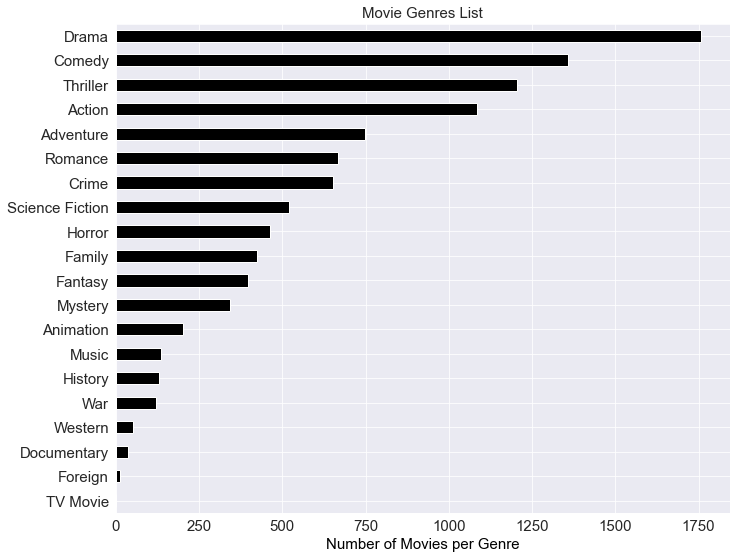

count                  20.00
mean                  515.15
std                   497.89
min                     1.00
25%                   126.50
50%                   410.50
75%                   687.50
max                 1,756.00
dtype: float64

In [26]:
genres_b = count_genres.plot.barh(color = "black", fontsize = 15)  
genres_b.set_title('Movie Genres List', fontsize = 15)
genres_b.set_xlabel('Number of Movies per Genre', color = 'black', fontsize = 15) 
genres_b.figure.set_size_inches(11,9)
plt.show()

count_genres.describe()

Adding on the 'describe' option at the end, give us important stats on the genres. 20 total genres with a range of 1 to 1756. The mean is 515 with a standard deviation of 498.

Now let's just take a look at the top 10 genres... below we will pull the top10 from the group.

In [27]:
top10_genres = count_genres.tail(10)
top10_genres

Family              425
Horror              463
Science Fiction     519
Crime               651
Romance             667
Adventure           749
Action             1085
Thriller           1204
Comedy             1358
Drama              1756
dtype: int64

We can do a cool pie graph to visualize the top 10 genres, allowing better visualization of the distribution.

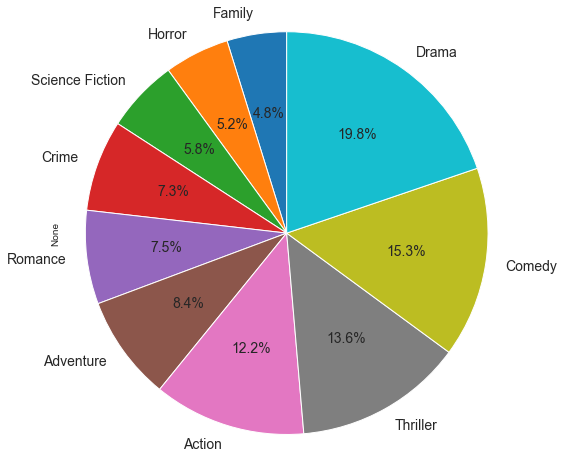

In [28]:
top10_genres.plot.pie(y='genres', fontsize = 14, figsize=(8, 8), autopct='%1.1f%%', startangle=90 )
plt.axis('equal')
plt.show()

Looking at the pie chart, we can see that Drama, Comedy, and Thriller make up almost 50% of the top 10 genres.

### Research Question 2 (Have movie profits increased or decreased over the years?)

To get a start on our second question let's take a quick look at all the movie profits to see the range we are dealing with.

In [29]:
movies_df['profit'].describe()

count               3,854.00
mean           92,824,697.22
std           194,071,459.73
min          -413,912,431.00
25%            -1,504,994.75
50%            27,370,641.50
75%           107,454,751.50
max         2,750,136,651.00
Name: profit, dtype: float64

By looking at the stats for profit, we can see we are dealing with a very wide range of profit. Going from a major loss of 413 Million, all the way to a massive profit of 2.7 Billion. With the average being almost 93 million, and a large standard deviation of 194 Million.

Now we will plot this data, adding on the years, so we can see if movie profit has increased or decreased over time.

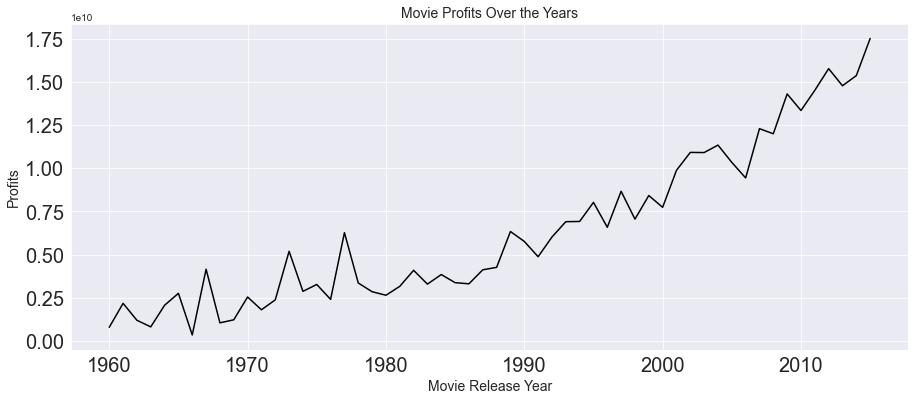

In [30]:
profits_by_year = movies_df.groupby('release_year')['profit'].sum() 
yearly_profit = profits_by_year.plot.line(color = "black", fontsize = 20)
yearly_profit.set_title('Movie Profits Over the Years', fontsize = 14) 
yearly_profit.set_xlabel('Movie Release Year', fontsize = 14)
yearly_profit.set_ylabel('Profits', fontsize = 14)
yearly_profit.figure.set_size_inches(15,6)
plt.show()

Looking at this line chart we can see that movie profit has steadily increased over the years. There are however spikes of profit and loss as time progresses. We can see that between 1980 and 1985, profit remained steady, with hardly any increase or decrease.


Let's take a look at the top 10 years for high profit and the top 10 years of low profit.

In [31]:
top10profit_years = profits_by_year.sort_values(ascending = False)
top10profit_years.head(10)

release_year
2015    17509565964
2012    15762759104
2014    15360299822
2013    14773174145
2011    14508684541
2009    14300047774
2010    13341222037
2007    12289908088
2008    11994810031
2004    11339547656
Name: profit, dtype: int64

So we can see that 2015 (the largest year in our dataset) had the largest profit.

In [32]:
bottom10profit_years = profits_by_year.sort_values(ascending = True)
bottom10profit_years.head(10)

release_year
1966     352485422
1960     797740716
1963     821753299
1968    1054889553
1962    1202944839
1969    1229648260
1971    1810958712
1964    2071667861
1961    2181770346
1972    2384284551
Name: profit, dtype: int64

And 1966 (the first year in our dataset) had the lowest profit.

### Research Question 3 (What are the top 10 most profitable movies and bottom 10 least profitable movies?)

To answer this question we will use our predefined functions of top10 and bottom10.

In [33]:
top10_profit = top10('profit')
top10_profit = top10_profit[['original_title', 'profit', 'genres', 'release_year']]
top10_profit

,original_title,profit,genres,release_year
1329,Star Wars,2750136651,Adventure|Action|Science Fiction,1977
1386,Avatar,2586236848,Action|Adventure|Fantasy|Science Fiction,2009
5231,Titanic,2234713671,Drama|Romance|Thriller,1997
10594,The Exorcist,2128035625,Drama|Horror|Thriller,1973
9806,Jaws,1878643093,Horror|Thriller|Adventure,1975
8889,E.T. the Extra-Terrestrial,1767968064,Science Fiction|Adventure|Family|Fantasy,1982
3,Star Wars: The Force Awakens,1718723210,Action|Adventure|Science Fiction|Fantasy,2015
8094,The Net,1551568265,Crime|Drama|Mystery|Thriller|Action,1995
10110,One Hundred and One Dalmatians,1545635295,Adventure|Animation|Comedy|Family,1961
7309,The Empire Strikes Back,1376997526,Adventure|Action|Science Fiction,1980


Now that we have our list of the top 10 most profitable movies, we can see that Star Wars (in the year 1977) had the highest profit, coming in at an impressive 2.75 Billion Dollars!

Next, we will look at the 10 biggest losses.

In [34]:
bottom10_profit = bottom10('profit')
bottom10_profit = bottom10_profit[['original_title', 'profit', 'genres', 'release_year']]
bottom10_profit

,original_title,profit,genres,release_year
2244,The Warrior's Way,-413912431,Adventure|Fantasy|Action|Western|Thriller,2010
5508,The Lone Ranger,-155110171,Action|Adventure|Western,2013
7031,The Alamo,-137586847,Western|History|War,2004
2435,The 13th Warrior,-128681336,Adventure|Fantasy|Action,1999
4970,Brother Bear,-118534968,Animation|Adventure|Family|Fantasy,2003
8102,Cutthroat Island,-113737078,Action|Adventure,1995
4078,The Adventures of Pluto Nash,-112614267,Action|Comedy|Science Fiction,2002
3484,Mars Needs Moms,-107610203,Adventure|Animation|Family,2011
7332,Heaven's Gate,-107205950,Action|Drama|History|Western,1980
8765,Supernova,-95189608,Science Fiction,2000


Having our list of the 10 biggest losses, we can see that "The Warrior's Way" (in the year 2010) lost 413 Million Dollars. Wow! 

If we were going to dive deeper into these numbers, "The Warrior's Way" might be a possible outliner we would want to consider excluding from our numbers.

### Research Question 4 (Has movie runtime increased over the years?)

As we start to work on this question, we will take a look at the overall runtime of the movies in the dataset.

We can make a quick histogram to show the distribution of movie runtimes.

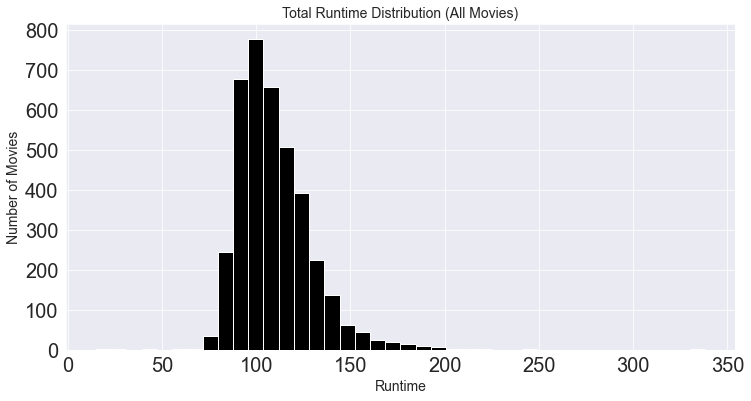

count               3,854.00
mean                  109.22
std                    19.92
min                    15.00
25%                    95.00
50%                   106.00
75%                   119.00
max                   338.00
Name: runtime, dtype: float64

In [35]:
total_movie_runtime = movies_df['runtime']
movie_runtime = total_movie_runtime.plot.hist(color = "black", fontsize = 20, bins=40)
movie_runtime.set_title('Total Runtime Distribution (All Movies)', fontsize = 14) 
movie_runtime.set_xlabel('Runtime', fontsize = 14)
movie_runtime.set_ylabel('Number of Movies', fontsize = 14)
movie_runtime.figure.set_size_inches(12,6)
plt.show()
movies_df['runtime'].describe()

The average runtime is 109 minutes with a standard deviation of approx 20 minutes, which sounds very reasonable. We have a max runtime of 338 minutes which is pretty long for a movie. And the minimum is 15 minutes which is pretty short for a movie. Next, we will look at the top 10 runtimes and the bottom 10 runtimes to get an idea of the distribution range.

In [36]:
top10_runtime = top10('runtime')
top10_runtime = top10_runtime[['original_title', 'runtime', 'genres', 'release_year']]
top10_runtime

,original_title,runtime,genres,release_year
2107,Carlos,338,Crime|Drama|Thriller|History,2010
10443,Cleopatra,248,Drama|History|Romance,1963
7332,Heaven's Gate,219,Action|Drama|History|Western,1980
9850,Lawrence of Arabia,216,Adventure|Drama|History|War,1962
5065,Gods and Generals,214,Drama|History|War,2003
3110,Jodhaa Akbar,213,Action|Adventure|Drama|Foreign|History,2008
8282,Malcolm X,202,Drama|History,1992
4949,The Lord of the Rings: The Return of the King,201,Adventure|Fantasy|Action,2003
9758,The Godfather: Part II,200,Drama|Crime,1974
10716,The Greatest Story Ever Told,199,Drama|History,1965


The longest runtime belongs to the movie "Carlos", coming in at almost an hour longer than any other movie in the dataset. This is a possible outliner.

Now we will look at the shortest movies.

In [37]:
bottom10_runtime = bottom10('runtime')
bottom10_runtime = bottom10_runtime[['original_title', 'runtime', 'genres', 'release_year']]
bottom10_runtime

,original_title,runtime,genres,release_year
5162,Kid's Story,15,Science Fiction|Animation,2003
8005,Mickey's Christmas Carol,26,Family|Animation,1983
3239,Dr. Horrible's Sing-Along Blog,42,Adventure|Action|Comedy|Science Fiction|Music,2008
3818,Louis C.K.: Live at the Beacon Theater,62,Comedy,2011
3424,Winnie the Pooh,63,Animation|Family,2011
7020,9 Songs,66,Drama|Music|Romance,2004
9462,The Land Before Time,69,Animation|Adventure|Family,1988
10093,Paris is Burning,71,Documentary,1990
4966,The Jungle Book 2,72,Family|Animation|Adventure,2003
4000,Return to Never Land,72,Adventure|Fantasy|Animation|Family,2002


The shortest movie is "Kid's Story" with only 15 minutes of runtime. The next shortest is "Mickey's Christmas Carol" with 26 minutes of runtime. Both of these are possible outliners, but further analysis would be needed to determine that. 

Now we will plot the data in a scatter plot so we can see what the runtime looks like over the years.

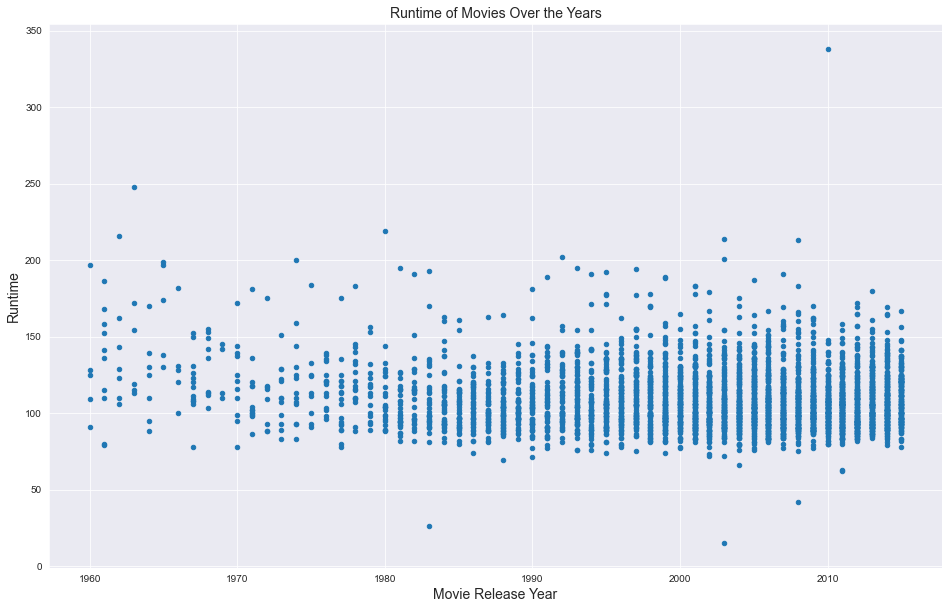

In [38]:
runtime_yearly_df = movies_df[['runtime', 'release_year']]
runtime_yearly_df.plot.scatter(x = 'release_year', y = 'runtime', figsize=(16, 10))
plt.title('Runtime of Movies Over the Years', fontsize = 14)
plt.xlabel('Movie Release Year', fontsize = 14)
plt.ylabel('Runtime', fontsize = 14)
plt.show()

Looking at the runtime over the years on this scatter plot, it appears that movie runtime is fairly consistent within the range of 95 to 125 minutes (which happens to be the 25% to 75% range). We see an increase in the number of movies made, along with a slight increase in runtime minutes starting in the years 1995-2000 and continuing through the last year 2015. 

<a id='conclusions'></a>
## Conclusions

>In analyzing this dataset we were able to identify the genres that are most commonly produced. We also discovered that based on the data we looked at, movie profits have increased over time. We identified the top 10 most profitable movies in the list, and the bottom 10 least profitable movies. And we took a look at movie runtime over the years and found a slight increase.
>
>Limitations... The dataset we used may not be accurate or complete. Also, our findings are limited, based on visual observations which may not be accurate. We also deleted many rows from the dataset due to missing or incomplete information. And we excluded many of the columns that were not used for our analysis. 


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

### Credits

The following websites were referred to for instruction help on code.

http://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/#:~:text=To%20sort%20a%20dataframe%20based%20on%20the%20values,use%20the%20argument%20ascending%3DFalse.%20sort_by_life%20%3D%20gapminder.sort_values%20%28%27lifeExp%27%2Cascending%3DFalse%29

https://datatofish.com/plot-dataframe-pandas/

https://www.bing.com/videos/search?q=split+a+column+pandas&docid=608054467233907238&mid=FC07BEB8A1A698171DD7FC07BEB8A1A698171DD7&view=detail&FORM=VIRE

http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

https://classroom.udacity.com/nanodegrees/nd002-wgu/parts/c1ed760c-732f-4e01-ac3d-42f22d4edde7/modules/cbf016b8-5604-4e61-bda4-5e2a041f3ecf/lessons/7a2052d7-5b19-4ca3-8a52-39f3ffc6ed6a/concepts/53961386540923

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html https://datatofish.com/replace-nan-values-with-zeros/

https://github.com/leogovan/investigate-a-dataset/blob/master/investigate-a-dataset-tidyup-version.ipynb

https://github.com/saeedfalana/Investigate_a_Dataset_tmdb-movies/blob/master/Untitled.ipynb

https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

https://thispointer.com/pandas-find-maximum-values-position-in-columns-or-rows-of-a-dataframe/